# Homework
### Dean Sayre

Merging compact objects produces a chirp signal in the gravitational wave detector.
Assume the chirp signal is 
\begin{equation}
y(t)=\begin{cases} sin(t^2) \quad 0<t<15 \\
0 \quad else\\
\end{cases}
\end{equation}

Please do wavelet transform to show the chirp signal is similar to the one you have seen
online. (Notice that the figure online has time as x-axis and frequency as the y-axis)
(You are welcome to use any wavelet you prefer.)

In [1]:
# Transform  sin(t*t) and the signal given in the beginning (use Morlet wavelet)

import matplotlib.pyplot as plt
from numpy import *
import numpy as np

ns=100
ntau=300
dstep=3./ns 
sar=arange(0.001,3.001,dstep)
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep)
ystau=zeros((ns, ntau),complex)

nt=750
dtstep=15./nt

tar=arange(0.,15.,dtstep) # array of times
yarr=zeros(750) # array of wave

# wave chirp function
def func(t):
    if(0<t and t<15):
        y=sin(t*t)
    else:
        y=0
    return y


def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi


def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau] = ((1/np.sqrt(sar[idexs])) * 
            np.sum(yarr *dtstep *np.conjugate(morlet((tar-tauar[idextau])/sar[idexs],1))))    # Please finish this line
           
wavelet()

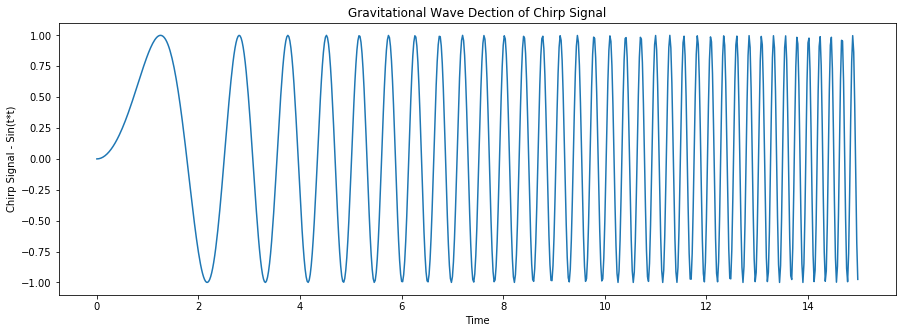

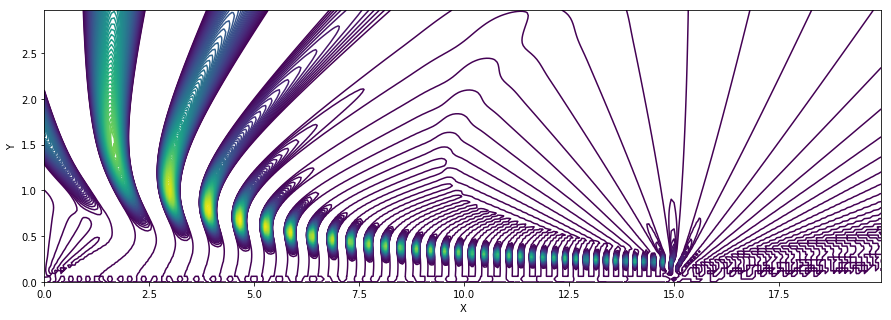

In [2]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   

# plot one
fig = p.figure(figsize = (15,5))                                    
p.title('Gravitational Wave Dection of Chirp Signal')
p.xlabel('Time')
p.ylabel('Chirp Signal - Sin(t*t)')
p.plot(tar,yarr)
p.show()


fig = p.figure(figsize = (15,5))  
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(tauar,sar,ystau.imag, levels=levels) 
p.xlabel('X')
p.ylabel('Y')
p.show()

Compared to the plots seen online of GW chirp signals, the above plots seem to behave simalarly near larger times. Like online, the above plots increase increase wave frequency with time. The only difference is that online, the amplitude increases with time.